In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.ticker

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
covid_19_tests_df = pd.read_csv('tests-vs-confirmed-cases-covid-19.csv')
covid_19_tests_df.head(2)

,Entity,Code,Year,Total number of tests for COVID-19,Total confirmed cases of COVID-19
0,Afghanistan,AFG,35,NaN,1.0
1,Afghanistan,AFG,36,NaN,1.0


### Extraction of data for countries that report the number of all tests

In [5]:
total_tests_df = covid_19_tests_df[covid_19_tests_df['Total number of tests for COVID-19'].notna()].dropna()
total_tests_df = total_tests_df.drop(columns = ['Code', 'Year'])
total_tests_df.columns = ['Country', 'Total number of tests for COVID-19', 'Total confirmed cases of COVID-19']
total_tests_df.head(2)

,Country,Total number of tests for COVID-19,Total confirmed cases of COVID-19
99,Armenia,694.0,26.0
177,Austria,10278.0,1132.0


### Plot on logarithmic scale

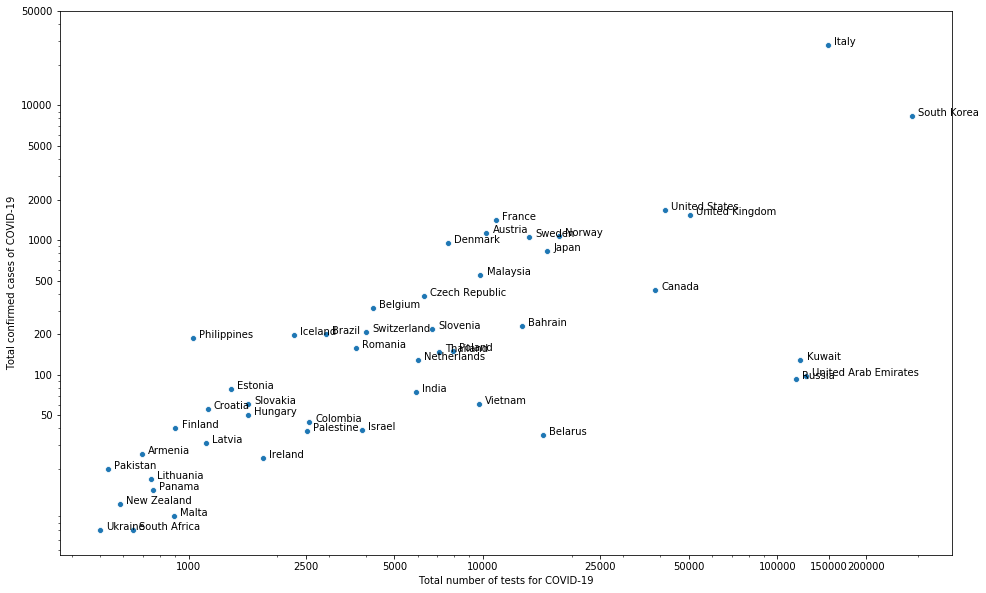

In [6]:
df = total_tests_df.reset_index(drop=True)
x = 'Total number of tests for COVID-19'
y = 'Total confirmed cases of COVID-19'
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.scatterplot(x = x, y = y, data = total_tests_df)
ax.set(xscale="log")
ax.set(yscale="log")
ax.set_xticks([1000, 2500, 5000, 10_000, 25_000, 50_000, 100_000, 150_000, 200_000])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_yticks([50, 100, 200, 500, 1000, 2000, 5000, 10_000, 50_000])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
for i in range(0,df.shape[0]):
    ax.text(df[x][i]+ 0.05 * df[x][i], df[y][i], df.Country[i], horizontalalignment='left', size='medium', color='black')

Plot above show how many test was taken and how many cases was confirmed. The more on right the country is on x axis, the more tests it has done, and the higher the more confirmed cases it has.

The lower corner countries have a large number of tests carried out with a relatively low incidence of the disease.

### Comparison of the total number of tests

Sorting by quantity of tests

In [7]:
total_test_count = df[['Country', 'Total number of tests for COVID-19']].sort_values(by='Total number of tests for COVID-19', ascending=False)

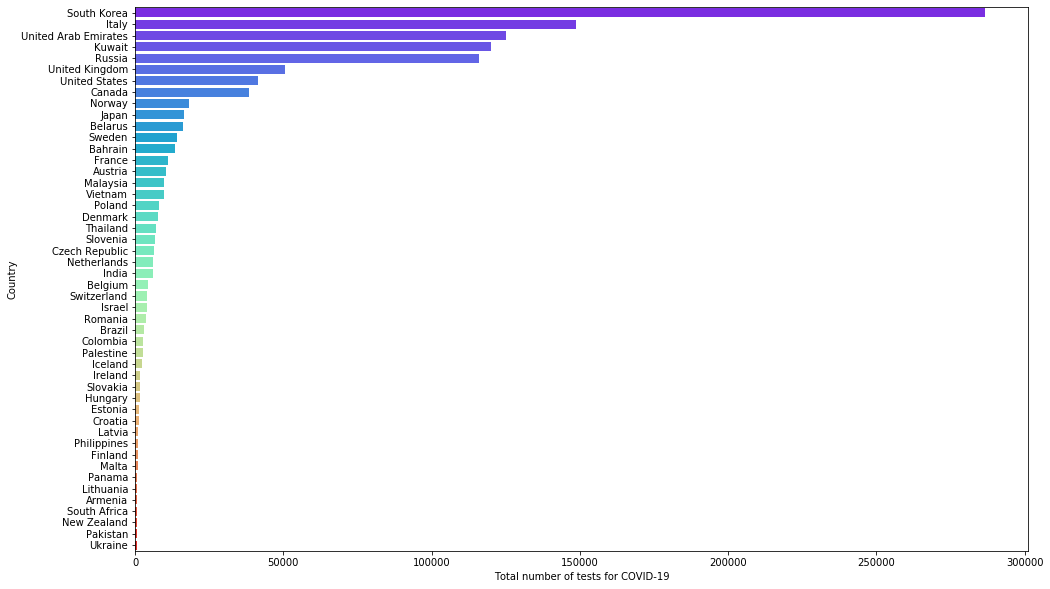

In [8]:
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.barplot(x='Total number of tests for COVID-19', y = 'Country', data=total_test_count, palette = sns.color_palette("rainbow", len(total_test_count)))

In [9]:
population = pd.read_csv('pop2.csv', header=None)
population.columns = ['Country', 'Population']
population['Country'] = population['Country'].str.lstrip()
total_test_count['Country'] = total_test_count['Country'].str.lstrip()
population['Country'] = population['Country'].replace('Korea, South', 'South Korea')
population['Country'] = population['Country'].replace('Czechia', 'Czech Republic')

In [10]:
total_test_count = total_test_count.merge(population, how = 'left', on = 'Country')

In [11]:
total_test_count['Population'][total_test_count['Country'] == 'Palestine'] = '5,052,000'

In [12]:
total_test_count['Population'] = total_test_count['Population'].str.replace(',','')

In [13]:
total_test_count['Total number of tests for COVID-19'] = total_test_count['Total number of tests for COVID-19'].astype('int')
total_test_count['Population'] = total_test_count['Population'].astype('int')

In [14]:
pct_total = total_test_count['Total number of tests for COVID-19'] / total_test_count['Population']
total_test_count['Pct test/population'] = pct_total
total_test_count = total_test_count.sort_values(by='Pct test/population', ascending=False)

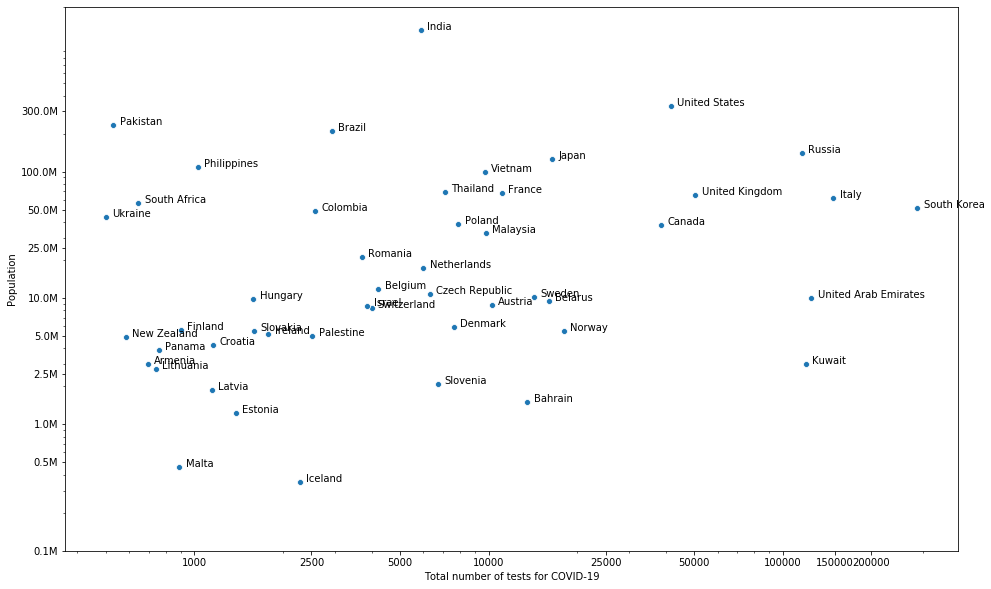

In [15]:
df = total_test_count.reset_index(drop=True)
x = 'Total number of tests for COVID-19'
y = 'Population'
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.scatterplot(x = x, y = y, data = df)
ax.set(xscale="log")
ax.set(yscale="log")
ax.set_xticks([1000, 2500, 5000, 10_000, 25_000, 50_000, 100_000, 150_000, 200_000])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
y_axis_my = round(df.Population/100000, 2)
ax.set_yticks([100_000, 500_000, 1_000_000, 2_500_000, 5_000_000, 10_000_000, 25_000_000, 50_000_000, 100_000_000, 300_000_000])
ax.get_yaxis().set_major_formatter(formatter)

for i in range(0,df.shape[0]):
    ax.text(df[x][i] + 0.05 * df[x][i], df[y][i] , df.Country[i], horizontalalignment='left', size='medium', color='black')

### Comparison of the percentage of tests to the size of the population

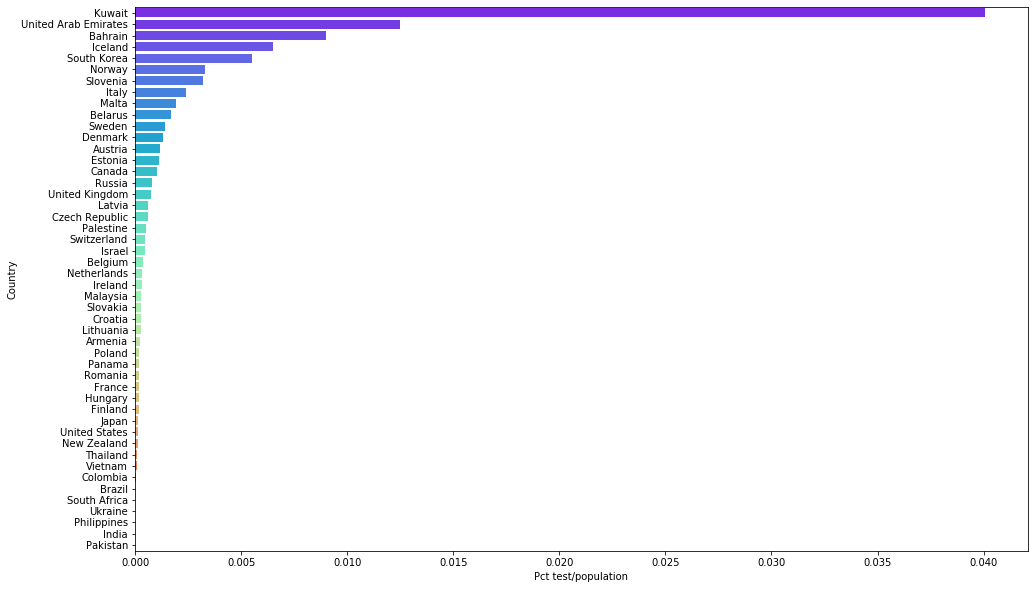

In [16]:
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.barplot(x='Pct test/population', y = 'Country', data=total_test_count, palette = sns.color_palette("rainbow", len(total_test_count)))